# Bilateral Filtering

---


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

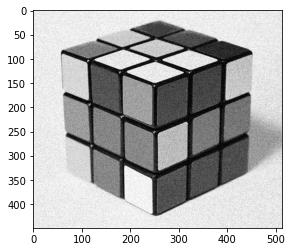

Image shape:  (449, 513)


In [5]:
img = cv2.imread('./images/rubiks_cube.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

print('Image shape: ', img.shape)

In [6]:
filter_size = 5
spread = (filter_size - 1) // 2
sigma = 1
s_squared = 2 * sigma * sigma

gaussian_filter = np.zeros((filter_size, filter_size))
print(gaussian_filter)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [9]:
for i in range(-spread, spread + 1):
  for j in range(-spread, spread + 1):
    gaussian_filter[i + spread][j + spread] = np.exp(-((i ** 2) + (j ** 2)) / s_squared)

print(gaussian_filter)

[[0.01831564 0.082085   0.13533528 0.082085   0.01831564]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.13533528 0.60653066 1.         0.60653066 0.13533528]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.01831564 0.082085   0.13533528 0.082085   0.01831564]]


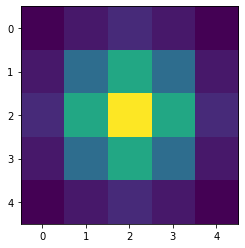

In [10]:
plt.imshow(gaussian_filter)
plt.show()

In [12]:
padded_img = cv2.copyMakeBorder(img, spread, spread, spread, spread, cv2.BORDER_REPLICATE)

print(padded_img.shape)

(453, 517)


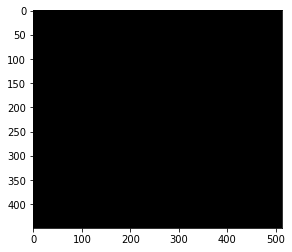

(449, 513)


In [14]:
result = np.zeros(img.shape)

plt.imshow(result, cmap="gray")
plt.show()

print(result.shape)

In [15]:
def convolve(img, kernel, kernel_size: int):
    # Getting image shape, kernel size and padding size
    image_width, image_height = img.shape[:2]
    padding = (kernel_size - 1) // 2

    padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

    # Making an empty image for the output image with the same shape as the input image with zero values(black)
    output_img = np.zeros(img.shape)
    sigma = 5
    s_squared = 2 * sigma ** 2
    intensity_filter = np.zeros((filter_size, filter_size))

    # Looping over the image and applying the convolution
    for x in range(padding, image_width + padding):
        for y in range(padding, image_height + padding):
            value = 0

            for i in range(-padding, padding + 1):
                for j in range(-padding, padding + 1):
                    intensity_filter[i - padding][j - padding] = np.exp((padded_img[x][y] - padded_img[x + i][y + j])**2 / s_squared)
            
            filter = np.multiply(kernel, intensity_filter)
            for i in range(-padding, padding + 1):
                for j in range(-padding, padding + 1):
                    value += padded_img[x + i, y + j] * filter[i + padding, j + padding]
            output_img[x - padding, y - padding] = value
    
    return output_img

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16928\1118209398.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_filter[i - padding][j - padding] = np.exp((padded_img[x][y] - padded_img[x + i][y + j])**2 / s_squared)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16928\1118209398.py:21: RuntimeWarning: overflow encountered in exp
  intensity_filter[i - padding][j - padding] = np.exp((padded_img[x][y] - padded_img[x + i][y + j])**2 / s_squared)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16928\1118209398.py:26: RuntimeWarning: overflow encountered in multiply
  value += padded_img[x + i, y + j] * filter[i + padding, j + padding]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16928\1118209398.py:26: RuntimeWarning: invalid value encountered in multiply
  value += padded_img[x + i, y + j] * filter[i + padding, j + padding]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16928\1118209398.py:26: RuntimeWarning: overflow encountered in double_scalars
  value += padded_img[x + i, y + j]

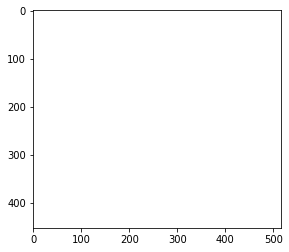

In [16]:
result = convolve(padded_img, gaussian_filter, filter_size)

plt.imshow(result, cmap="gray")
plt.show()

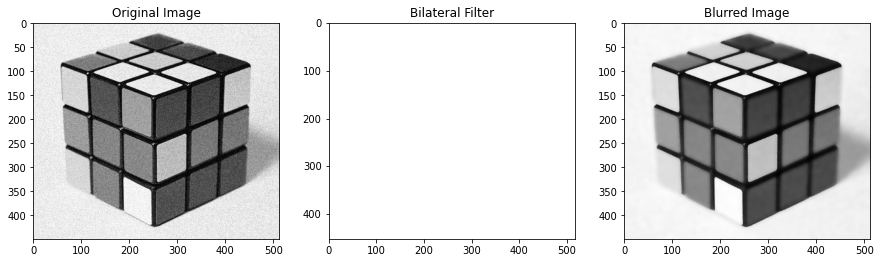

In [20]:
blurred_img = cv2.bilateralFilter(img, 15, 75, 75)

figure, axis = plt.subplots(1, 3, figsize=(15, 15))
axis[0].imshow(img, cmap='gray')
axis[0].set_title('Original Image')
axis[1].imshow(result, cmap='gray')
axis[1].set_title('Bilateral Filter')
axis[2].imshow(blurred_img, cmap='gray')
axis[2].set_title('Blurred Image')
plt.show()